<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/CNN%20%26%20neural%20network%20tasks%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1

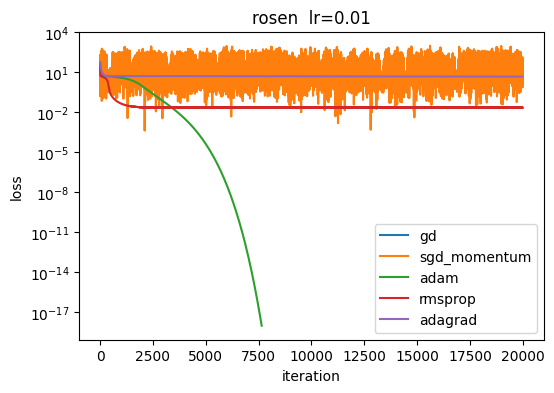

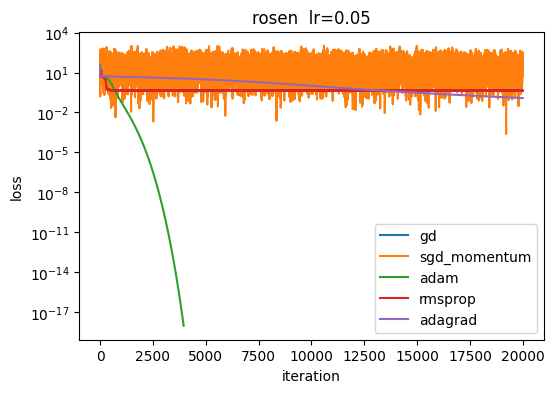

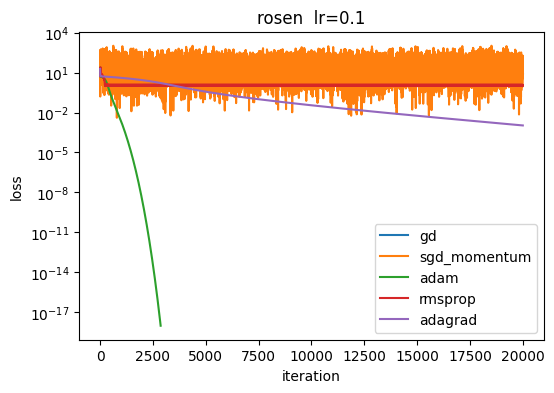

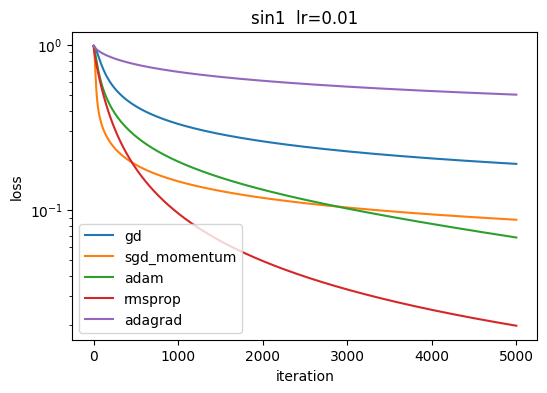

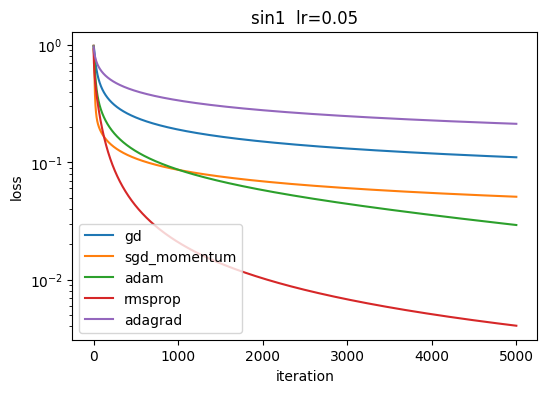

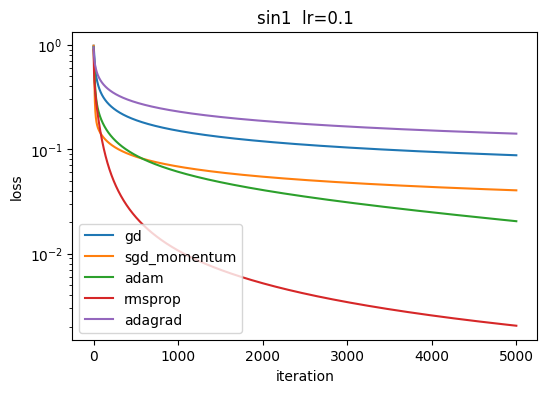

In [ ]:
import math, time
import numpy as np
import matplotlib.pyplot as plt


# ----------------------------
# test functions + gradients
# ----------------------------
def rosen(p):
    x, y = p
    return (1 - x)**2 + 100 * (y - x*x)**2

def grad_rosen(p):
    x, y = p
    gx = -2 * (1 - x) - 400 * x * (y - x*x)
    gy = 200 * (y - x*x)
    return np.array([gx, gy], dtype=float)


def sin1(x):
    return 0.0 if abs(x) < 1e-12 else math.sin(1.0 / x)

def grad_sin1(x):
    return 0.0 if abs(x) < 1e-12 else -math.cos(1.0 / x) / (x * x)


# -----------------------------------
# generic loop implementing optimizers
# -----------------------------------
def run_optimizer(grad_fn, loss_fn, init, lr, method,
                  max_it=5000, tol=1e-9, max_step=1.0,
                  grad_clip=1e6, diverge=1e12):

    p   = np.array(init, dtype=float)
    log = []

    # state tensors
    v   = np.zeros_like(p)        # momentum (SGD-Mom)
    s   = np.zeros_like(p)        # AdaGrad / RMSProp accumulator
    m   = np.zeros_like(p)        # Adam first moment
    v2  = np.zeros_like(p)        # Adam second moment

    b1, b2, eps = 0.9, 0.999, 1e-8   # Adam defaults
    decay       = 0.9                # RMSProp decay

    for t in range(1, max_it + 1):

        g = grad_fn(p)
        if not np.all(np.isfinite(g)):
            break
        gn = np.linalg.norm(g)
        if gn < tol:
            break
        if gn > grad_clip:
            g = g * (grad_clip / gn)

        # ----- update rules exactly as on slides -----
        if method == "gd":
            step = lr * g

        elif method == "sgd_momentum":            # Sutskever form
            v = b1 * v + g                       # ρ ≡ β1 on slide
            step = lr * v

        elif method == "adagrad":
            s += g * g
            step = lr * g / (np.sqrt(s) + eps)

        elif method == "rmsprop":
            s = decay * s + (1 - decay) * (g * g)
            step = lr * g / (np.sqrt(s) + eps)

        elif method == "adam":
            m  = b1 * m + (1 - b1) * g
            v2 = b2 * v2 + (1 - b2) * (g * g)
            m_hat  = m  / (1 - b1 ** t)          # bias correction
            v2_hat = v2 / (1 - b2 ** t)
            step = lr * m_hat / (np.sqrt(v2_hat) + eps)

        else:
            raise ValueError("unknown method")

        # optional global step clip
        snorm = np.linalg.norm(step)
        if snorm > max_step:
            step *= max_step / snorm

        # parameter update
        p -= step
        loss = loss_fn(p)
        if (not np.isfinite(loss)) or loss > diverge:
            break
        log.append(loss)

    return p, log


# ----------------------------
# experiments + plots
# ----------------------------
opts_rosen = ["gd", "sgd_momentum", "adam", "rmsprop", "adagrad"]
lrs_rosen  = [0.01, 0.05, 0.1]

opts_sin   = opts_rosen
lrs_sin    = [0.01, 0.05, 0.1]

histories = {}

# Rosenbrock 2-D
for lr in lrs_rosen:
    for opt in opts_rosen:
        _, h = run_optimizer(grad_rosen, rosen, [-1.5, 1.5], lr, opt,
                             max_it=20000, max_step=0.5, grad_clip=1e5)
        histories[("rosen", opt, lr)] = h

# sin(1/x) 1-D
for lr in lrs_sin:
    for opt in opts_sin:
        g_wrap = lambda z: np.array([grad_sin1(z[0])], dtype=float)
        _, h = run_optimizer(g_wrap, lambda z: sin1(z[0]), [0.7], lr, opt,
                             max_step=0.2)
        histories[("sin1", opt, lr)] = h


def plot_family(fn_name, lr_values):
    for lr in lr_values:
        plt.figure(figsize=(6,4))
        for opt in opts_rosen:
            h = np.array(histories[(fn_name, opt, lr)], dtype=float)
            if h.size == 0:
                continue
            h_plot = np.where(h <= 0, np.nan, h)
            plt.semilogy(h_plot, label=opt)
        plt.title(f"{fn_name}  lr={lr}")
        plt.xlabel("iteration")
        plt.ylabel("loss")
        plt.legend()
        plt.show()

plot_family("rosen", lrs_rosen)
plot_family("sin1",  lrs_sin)


#TASK 2


Training with optimizer: gd
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.9117
Epoch 200, Loss=1.4137
Epoch 300, Loss=1.3471
Epoch 400, Loss=1.3382
Epoch 500, Loss=1.3370
Epoch 600, Loss=1.3368
Epoch 700, Loss=1.3368
Epoch 800, Loss=1.3368
Epoch 900, Loss=1.3368
Test MSE with gd: 1.3107

Training with optimizer: momentum
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.9200
Epoch 200, Loss=1.3989
Epoch 300, Loss=1.3434
Epoch 400, Loss=1.3375
Epoch 500, Loss=1.3369
Epoch 600, Loss=1.3368
Epoch 700, Loss=1.3368
Epoch 800, Loss=1.3368
Epoch 900, Loss=1.3368
Test MSE with momentum: 1.3107

Training with optimizer: adam
Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4119
Epoch 400, Loss=0.4046
Epoch 500, Loss=0.4011
Epoch 600, Loss=0.3991
Epoch 700, Loss=0.3972
Epoch 800, Loss=0.3947
Epoch 900, Loss=0.3912
Test MSE with adam: 0.3898


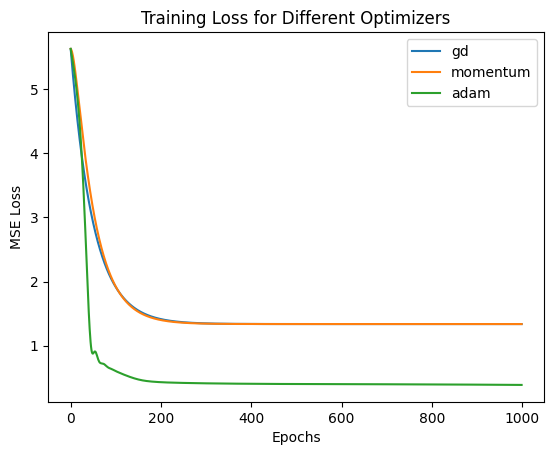

Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4119
Epoch 400, Loss=0.4046
Epoch 500, Loss=0.4011
Epoch 600, Loss=0.3991
Epoch 700, Loss=0.3972
Epoch 800, Loss=0.3947
Epoch 900, Loss=0.3912


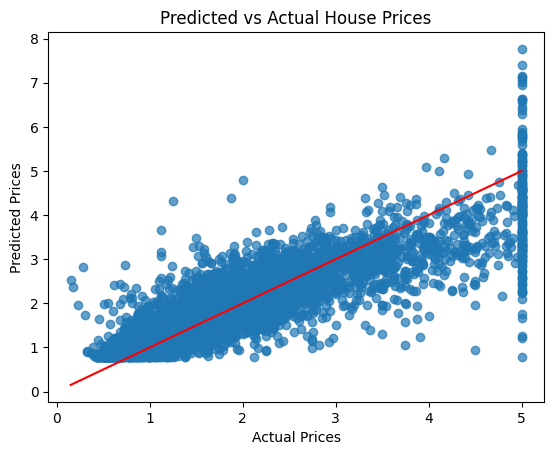

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing # Changed to California Housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Load Dataset
# -----------------------------
# Using California Housing dataset as load_boston is deprecated
housing = fetch_california_housing()
X = housing.data  # Use all features for now
y = housing.target.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Helper Functions
# -----------------------------
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# -----------------------------
# Neural Network Class
# -----------------------------
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, optimizer="gd", beta=0.9, beta2=0.999, epsilon=1e-8, l2_lambda=0.0):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.beta = beta
        self.beta2 = beta2
        self.epsilon = epsilon
        self.l2_lambda = l2_lambda
        self.parameters = self._init_weights()

        # For Momentum/Adam
        self.v = {k: np.zeros_like(v) for k, v in self.parameters.items()}
        self.s = {k: np.zeros_like(v) for k, v in self.parameters.items()}
        self.t = 0

    def _init_weights(self):
        np.random.seed(42)
        params = {}
        for l in range(1, len(self.layer_sizes)):
            params[f"W{l}"] = np.random.randn(self.layer_sizes[l-1], self.layer_sizes[l]) * 0.01
            params[f"b{l}"] = np.zeros((1, self.layer_sizes[l]))
        return params

    def forward(self, X):
        cache = {"A0": X}
        L = len(self.layer_sizes) - 1
        for l in range(1, L):
            Z = cache[f"A{l-1}"].dot(self.parameters[f"W{l}"]) + self.parameters[f"b{l}"]
            A = relu(Z)
            cache[f"Z{l}"] = Z
            cache[f"A{l}"] = A
        # Output layer (linear activation)
        ZL = cache[f"A{L-1}"].dot(self.parameters[f"W{L}"]) + self.parameters[f"b{L}"]
        cache[f"Z{L}"] = ZL
        cache[f"A{L}"] = ZL
        return cache

    def backward(self, cache, y):
        grads = {}
        L = len(self.layer_sizes) - 1
        m = y.shape[0]

        # Output layer gradient
        dZL = (cache[f"A{L}"] - y) / m
        grads[f"dW{L}"] = cache[f"A{L-1}"].T.dot(dZL) + (self.l2_lambda/m)*self.parameters[f"W{L}"]
        grads[f"db{L}"] = np.sum(dZL, axis=0, keepdims=True)

        dA_prev = dZL.dot(self.parameters[f"W{L}"].T)

        # Hidden layers
        for l in reversed(range(1, L)):
            dZ = dA_prev * relu_derivative(cache[f"Z{l}"])
            grads[f"dW{l}"] = cache[f"A{l-1}"].T.dot(dZ) + (self.l2_lambda/m)*self.parameters[f"W{l}"]
            grads[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True)
            dA_prev = dZ.dot(self.parameters[f"W{l}"].T)

        return grads

    def update_parameters(self, grads):
        self.t += 1
        for l in range(1, len(self.layer_sizes)):
            W, b = self.parameters[f"W{l}"], self.parameters[f"b{l}"]
            dW, db = grads[f"dW{l}"], grads[f"db{l}"]

            if self.optimizer == "gd":
                W -= self.learning_rate * dW
                b -= self.learning_rate * db
            elif self.optimizer == "momentum":
                self.v[f"W{l}"] = self.beta * self.v[f"W{l}"] + (1-self.beta)*dW
                self.v[f"b{l}"] = self.beta * self.v[f"b{l}"] + (1-self.beta)*db
                W -= self.learning_rate * self.v[f"W{l}"]
                b -= self.learning_rate * self.v[f"b{l}"]
            elif self.optimizer == "adam":
                self.v[f"W{l}"] = self.beta * self.v[f"W{l}"] + (1-self.beta)*dW
                self.v[f"b{l}"] = self.beta * self.v[f"b{l}"] + (1-self.beta)*db
                self.s[f"W{l}"] = self.beta2 * self.s[f"W{l}"] + (1-self.beta2)*(dW**2)
                self.s[f"b{l}"] = self.beta2 * self.s[f"b{l}"] + (1-self.beta2)*(db**2)
                vW_corr = self.v[f"W{l}"] / (1 - self.beta**self.t)
                vb_corr = self.v[f"b{l}"] / (1 - self.beta**self.t)
                sW_corr = self.s[f"W{l}"] / (1 - self.beta2**self.t)
                sb_corr = self.s[f"b{l}"] / (1 - self.beta2**self.t)
                W -= self.learning_rate * vW_corr / (np.sqrt(sW_corr) + self.epsilon)
                b -= self.learning_rate * vb_corr / (np.sqrt(sb_corr) + self.epsilon)

            self.parameters[f"W{l}"], self.parameters[f"b{l}"] = W, b

    def fit(self, X, y, epochs=1000):
        losses = []
        for i in range(epochs):
            cache = self.forward(X)
            loss = mse(y, cache[f"A{len(self.layer_sizes)-1}"])
            grads = self.backward(cache, y)
            self.update_parameters(grads)
            losses.append(loss)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss={loss:.4f}")
        return losses

    def predict(self, X):
        cache = self.forward(X)
        return cache[f"A{len(self.layer_sizes)-1}"]

# -----------------------------
# Training & Evaluation
# -----------------------------
# Updated layer sizes to match the number of features in California Housing (8 features)
layer_sizes = [X_train.shape[1], 5, 3, 1]

optimizers = ["gd", "momentum", "adam"]

for opt in optimizers:
    print(f"\nTraining with optimizer: {opt}")
    nn = NeuralNetwork(layer_sizes, learning_rate=0.01, optimizer=opt)
    losses = nn.fit(X_train, y_train, epochs=1000)

    # Predictions
    y_pred = nn.predict(X_test)
    test_mse = mse(y_test, y_pred)
    print(f"Test MSE with {opt}: {test_mse:.4f}")

    # Plot loss curve
    plt.plot(losses, label=f"{opt}")

plt.title("Training Loss for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# Plot Predicted vs Actual
# Re-initialize with updated layer_sizes
nn = NeuralNetwork(layer_sizes, learning_rate=0.01, optimizer="adam")
nn.fit(X_train, y_train, epochs=1000)
y_pred = nn.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()


Training with optimizer: gd, learning rate: 0.1
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.3368
Epoch 200, Loss=1.3368
Epoch 300, Loss=1.3368
Epoch 400, Loss=1.3368
Test MSE with gd (lr=0.1): 1.3107

Training with optimizer: gd, learning rate: 0.01
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.9117
Epoch 200, Loss=1.4137
Epoch 300, Loss=1.3471
Epoch 400, Loss=1.3382
Test MSE with gd (lr=0.01): 1.3104

Training with optimizer: gd, learning rate: 0.001
Epoch 0, Loss=5.6297
Epoch 100, Loss=4.8512
Epoch 200, Loss=4.2138
Epoch 300, Loss=3.6920
Epoch 400, Loss=3.2648
Test MSE with gd (lr=0.001): 2.8465

Training with optimizer: momentum, learning rate: 0.1
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.3368
Epoch 200, Loss=1.3368
Epoch 300, Loss=1.3368
Epoch 400, Loss=1.3368
Test MSE with momentum (lr=0.1): 1.3107

Training with optimizer: momentum, learning rate: 0.01
Epoch 0, Loss=5.6297
Epoch 100, Loss=1.9200
Epoch 200, Loss=1.3989
Epoch 300, Loss=1.3434
Epoch 400, Loss=1.3375
Test MSE with momentum (lr=0.

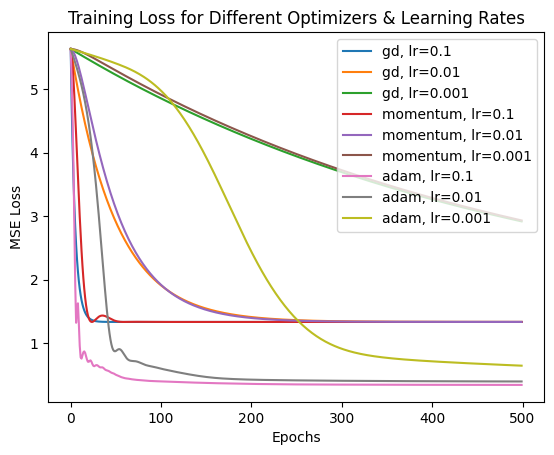

In [ ]:
# -----------------------------
# Training & Evaluation with Different Learning Rates
# -----------------------------
layer_sizes = [X_train.shape[1], 5, 3, 1]

optimizers = ["gd", "momentum", "adam"]
learning_rates = [0.1, 0.01, 0.001]  # try a few different ones

for opt in optimizers:
    for lr in learning_rates:
        print(f"\nTraining with optimizer: {opt}, learning rate: {lr}")
        nn = NeuralNetwork(layer_sizes, learning_rate=lr, optimizer=opt)
        losses = nn.fit(X_train, y_train, epochs=500)  # fewer epochs to compare quickly

        # Predictions
        y_pred = nn.predict(X_test)
        test_mse = mse(y_test, y_pred)
        print(f"Test MSE with {opt} (lr={lr}): {test_mse:.4f}")

        # Plot loss curve
        plt.plot(losses, label=f"{opt}, lr={lr}")

plt.title("Training Loss for Different Optimizers & Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Evaluate the trained model on the test set
y_pred = nn.predict(X_test)
# 3. Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.6632974435337083
Root Mean Squared Error (RMSE): 0.8144307481509452


#2nd BONUS QUES


Training network: 2 hidden layers
Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4119
Epoch 400, Loss=0.4046
2 hidden layers Test MSE: 0.40576949065605405

Training network: 3 hidden layers
Epoch 0, Loss=5.6297
Epoch 100, Loss=2.6975
Epoch 200, Loss=1.6381
Epoch 300, Loss=1.3808
Epoch 400, Loss=1.3409
3 hidden layers Test MSE: 1.3104106077321318


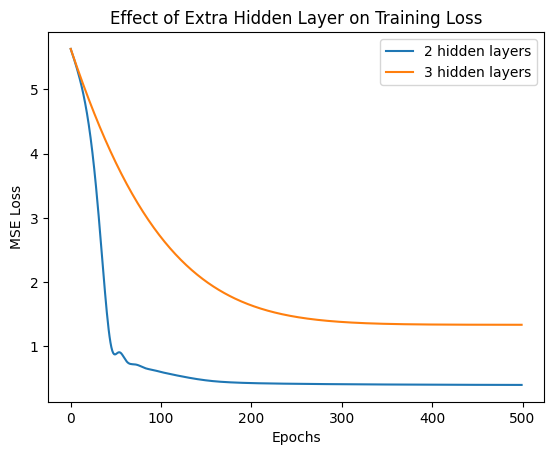


Training with L2=0.0
Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4119
Epoch 400, Loss=0.4046
L2=0.0 Test MSE: 0.40576949065605405

Training with L2=0.001
Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4119
Epoch 400, Loss=0.4046
L2=0.001 Test MSE: 0.4057597301579871

Training with L2=0.01
Epoch 0, Loss=5.6297
Epoch 100, Loss=0.6019
Epoch 200, Loss=0.4295
Epoch 300, Loss=0.4120
Epoch 400, Loss=0.4046
L2=0.01 Test MSE: 0.4057808715983329


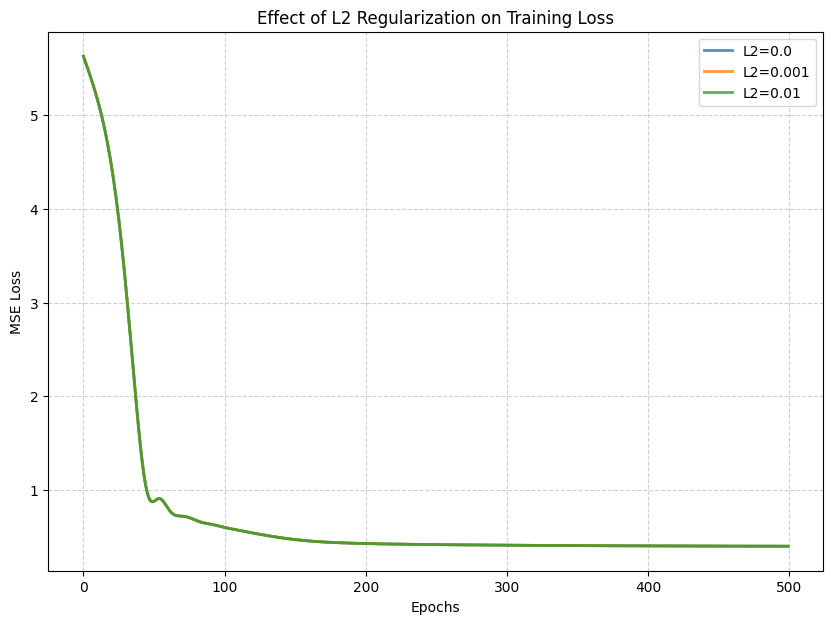

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# -----------------------------
# Load Dataset
# -----------------------------
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Activation & Loss
# -----------------------------
def relu(Z): return np.maximum(0, Z)
def relu_derivative(Z): return (Z > 0).astype(float)
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)

# -----------------------------
# Neural Network
# -----------------------------
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, optimizer="gd",
                 beta=0.9, beta2=0.999, epsilon=1e-8, l2_lambda=0.0):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.beta, self.beta2, self.epsilon = beta, beta2, epsilon
        self.l2_lambda = l2_lambda
        self.parameters = self._init_weights()
        self.v = {k: np.zeros_like(v) for k, v in self.parameters.items()}
        self.s = {k: np.zeros_like(v) for k, v in self.parameters.items()}
        self.t = 0

    def _init_weights(self):
        np.random.seed(42)
        params = {}
        for l in range(1, len(self.layer_sizes)):
            params[f"W{l}"] = np.random.randn(
                self.layer_sizes[l-1], self.layer_sizes[l]
            ) * 0.01
            params[f"b{l}"] = np.zeros((1, self.layer_sizes[l]))
        return params

    def forward(self, X):
        cache = {"A0": X}
        L = len(self.layer_sizes) - 1
        for l in range(1, L):
            Z = cache[f"A{l-1}"].dot(self.parameters[f"W{l}"]) + self.parameters[f"b{l}"]
            A = relu(Z)
            cache[f"Z{l}"], cache[f"A{l}"] = Z, A
        ZL = cache[f"A{L-1}"].dot(self.parameters[f"W{L}"]) + self.parameters[f"b{L}"]
        cache[f"Z{L}"], cache[f"A{L}"] = ZL, ZL  # linear output
        return cache

    def backward(self, cache, y):
        grads = {}
        L, m = len(self.layer_sizes) - 1, y.shape[0]
        dZL = (cache[f"A{L}"] - y) / m
        grads[f"dW{L}"] = cache[f"A{L-1}"].T.dot(dZL) + (self.l2_lambda/m)*self.parameters[f"W{L}"]
        grads[f"db{L}"] = np.sum(dZL, axis=0, keepdims=True)
        dA_prev = dZL.dot(self.parameters[f"W{L}"].T)
        for l in reversed(range(1, L)):
            dZ = dA_prev * relu_derivative(cache[f"Z{l}"])
            grads[f"dW{l}"] = cache[f"A{l-1}"].T.dot(dZ) + (self.l2_lambda/m)*self.parameters[f"W{l}"]
            grads[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True)
            dA_prev = dZ.dot(self.parameters[f"W{l}"].T)
        return grads

    def update_parameters(self, grads):
        self.t += 1
        for l in range(1, len(self.layer_sizes)):
            W, b = self.parameters[f"W{l}"], self.parameters[f"b{l}"]
            dW, db = grads[f"dW{l}"], grads[f"db{l}"]

            if self.optimizer == "gd":
                W -= self.learning_rate * dW
                b -= self.learning_rate * db
            elif self.optimizer == "momentum":
                self.v[f"W{l}"] = self.beta*self.v[f"W{l}"] + (1-self.beta)*dW
                self.v[f"b{l}"] = self.beta*self.v[f"b{l}"] + (1-self.beta)*db
                W -= self.learning_rate * self.v[f"W{l}"]
                b -= self.learning_rate * self.v[f"b{l}"]
            elif self.optimizer == "adam":
                self.v[f"W{l}"] = self.beta*self.v[f"W{l}"] + (1-self.beta)*dW
                self.v[f"b{l}"] = self.beta*self.v[f"b{l}"] + (1-self.beta)*db
                self.s[f"W{l}"] = self.beta2*self.s[f"W{l}"] + (1-self.beta2)*(dW**2)
                self.s[f"b{l}"] = self.beta2*self.s[f"b{l}"] + (1-self.beta2)*(db**2)
                vW_corr = self.v[f"W{l}"]/(1-self.beta**self.t)
                vb_corr = self.v[f"b{l}"]/(1-self.beta**self.t)
                sW_corr = self.s[f"W{l}"]/(1-self.beta2**self.t)
                sb_corr = self.s[f"b{l}"]/(1-self.beta2**self.t)
                W -= self.learning_rate*vW_corr/(np.sqrt(sW_corr)+self.epsilon)
                b -= self.learning_rate*vb_corr/(np.sqrt(sb_corr)+self.epsilon)

            self.parameters[f"W{l}"], self.parameters[f"b{l}"] = W, b

    def fit(self, X, y, epochs=500):
        losses = []
        for i in range(epochs):
            cache = self.forward(X)
            loss = mse(y, cache[f"A{len(self.layer_sizes)-1}"])
            grads = self.backward(cache, y)
            self.update_parameters(grads)
            losses.append(loss)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss={loss:.4f}")
        return losses

    def predict(self, X):
        cache = self.forward(X)
        return cache[f"A{len(self.layer_sizes)-1}"]

# -----------------------------
# Q1: Compare with extra hidden layer
# -----------------------------
layer_configs = {
    "2 hidden layers": [X_train.shape[1], 5, 3, 1],
    "3 hidden layers": [X_train.shape[1], 5, 3, 2, 1]
}

for name, layers in layer_configs.items():
    print(f"\nTraining network: {name}")
    nn = NeuralNetwork(layers, learning_rate=0.01, optimizer="adam")
    losses = nn.fit(X_train, y_train, epochs=500)
    y_pred = nn.predict(X_test)
    print(f"{name} Test MSE:", mean_squared_error(y_test, y_pred))
    plt.plot(losses, label=name)

plt.title("Effect of Extra Hidden Layer on Training Loss")
plt.xlabel("Epochs"); plt.ylabel("MSE Loss"); plt.legend(); plt.show()

# -----------------------------
# Q2: L2 Regularization Effect
# -----------------------------
l2_values = [0.0, 0.001, 0.01]
l2_losses = {}  # Dictionary to store losses for each L2 value
for l2 in l2_values:
    print(f"\nTraining with L2={l2}")
    nn = NeuralNetwork([X_train.shape[1], 5, 3, 1], learning_rate=0.01, optimizer="adam", l2_lambda=l2)
    losses = nn.fit(X_train, y_train, epochs=500)
    y_pred = nn.predict(X_test)
    print(f"L2={l2} Test MSE:", mean_squared_error(y_test, y_pred))
    l2_losses[l2] = losses # Store losses in the dictionary

plt.figure(figsize=(10,7)) # Increased figure size for better readability



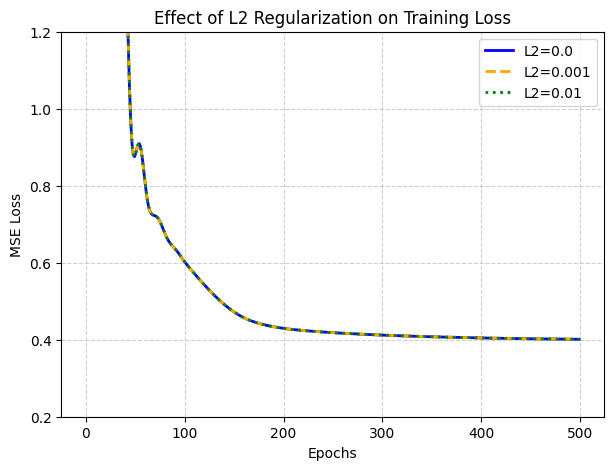

Layer sizes: [8, 5, 3, 2, 1]
W1: (8, 5), b1: (1, 5)
W2: (5, 3), b2: (1, 3)
W3: (3, 2), b3: (1, 2)
W4: (2, 1), b4: (1, 1)


In [ ]:
plt.figure(figsize=(7,5))

styles = {
    0.0: ("blue", "solid"),
    0.001: ("orange", "dashed"),
    0.01: ("green", "dotted")
}

for l2, loss in l2_losses.items():
    color, style = styles[l2]
    plt.plot(loss, label=f"L2={l2}", color=color, linestyle=style, linewidth=2)

plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Effect of L2 Regularization on Training Loss")
plt.ylim(0.2, 1.2)   # zoom into range where differences show
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
#------------------------------------------------------------------------------------------------------
def print_model_summary(nn):
    print("Layer sizes:", nn.layer_sizes)
    for l in range(1, len(nn.layer_sizes)):
        W = nn.parameters[f"W{l}"]
        b = nn.parameters[f"b{l}"]
        print(f"W{l}: {W.shape}, b{l}: {b.shape}")

nn = NeuralNetwork([X_train.shape[1], 5, 3, 2, 1], optimizer="adam", learning_rate=0.01)
print_model_summary(nn)


#3rd TASK - Linearly separable classes dataset -CASE 1

Best hidden nodes=2, Validation Accuracy=1.0000


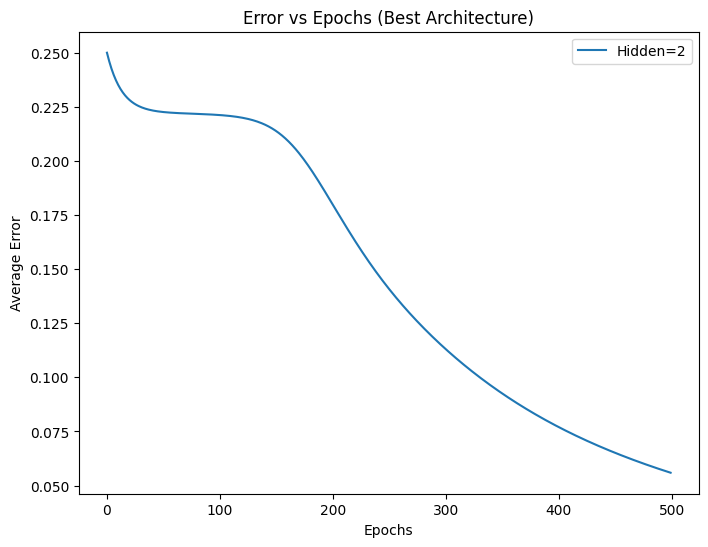

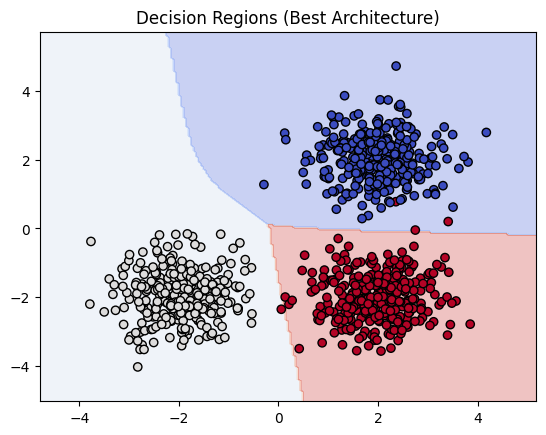


Validation Confusion Matrix:
[[ 98   0   0]
 [  0 103   0]
 [  0   0  99]]
Validation Accuracy: 1.0

Test Confusion Matrix:
[[ 96   0   0]
 [  0 111   0]
 [  1   1  91]]
Test Accuracy: 0.9933333333333333


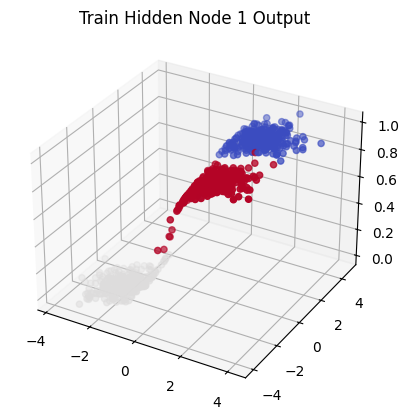

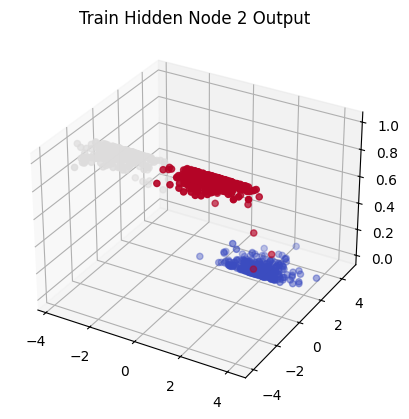

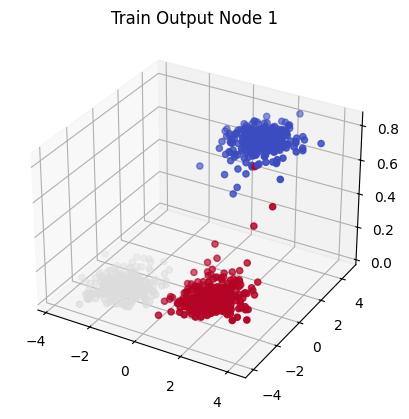

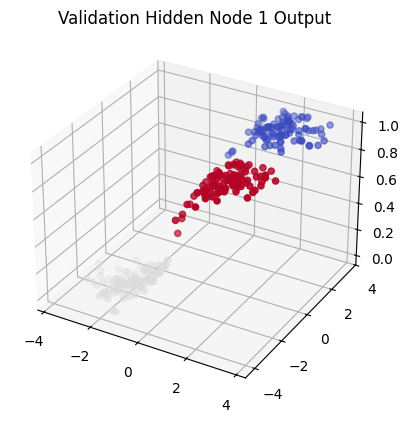

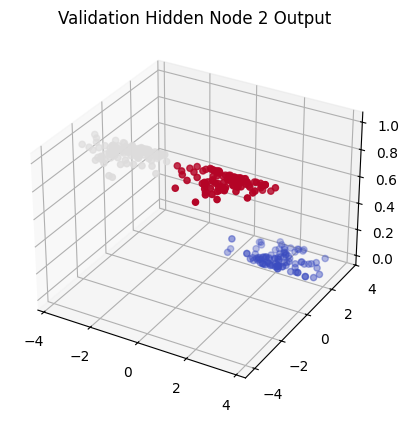

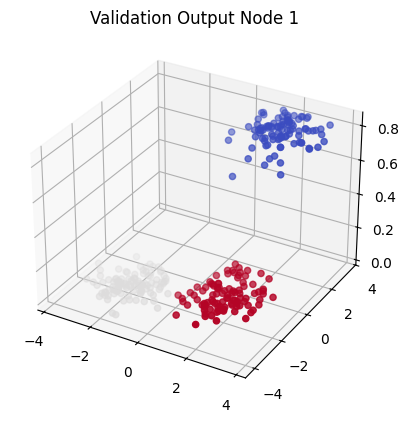

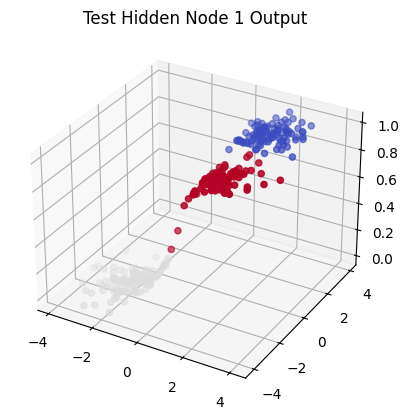

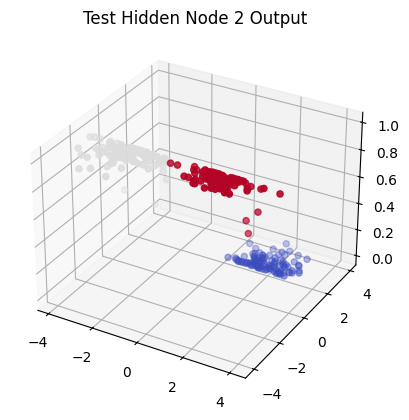

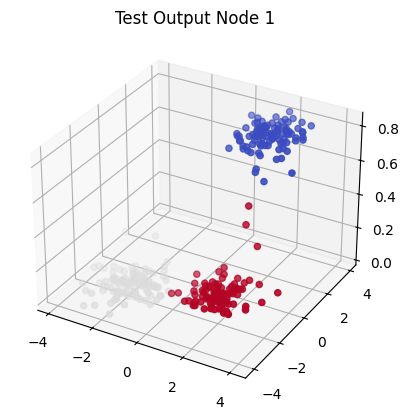

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------
# Step 1: Generate linearly separable dataset
# ---------------------------
np.random.seed(42)
N = 500
mean1, mean2, mean3 = [2, 2], [-2, -2], [2, -2]
cov = [[0.5, 0], [0, 0.5]]

X1 = np.random.multivariate_normal(mean1, cov, N)
X2 = np.random.multivariate_normal(mean2, cov, N)
X3 = np.random.multivariate_normal(mean3, cov, N)

X = np.vstack((X1, X2, X3))
y = np.array([0]*N + [1]*N + [2]*N)

# One-hot encoding
def one_hot(y, num_classes=3):
    return np.eye(num_classes)[y]

Y = one_hot(y, 3)

# Train/val/test split
def split_data(X, y, Y, train_ratio=0.6, val_ratio=0.2):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X, y, Y = X[idx], y[idx], Y[idx]

    n_train = int(train_ratio*len(X))
    n_val = int(val_ratio*len(X))

    X_train, y_train, Y_train = X[:n_train], y[:n_train], Y[:n_train]
    X_val, y_val, Y_val = X[n_train:n_train+n_val], y[n_train:n_train+n_val], Y[n_train:n_train+n_val]
    X_test, y_test, Y_test = X[n_train+n_val:], y[n_train+n_val:], Y[n_train+n_val:]

    return X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test

X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test = split_data(X, y, Y)

# ---------------------------
# Step 2: FCNN Implementation (1 hidden layer)
# ---------------------------
class FCNN:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b2 = np.zeros((1, output_dim))
        self.lr = lr

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def sigmoid_deriv(self, a):
        return a*(1-a)

    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)  # final output
        return self.a2

    def backward(self, X, Y):
        m = X.shape[0]
        error = self.a2 - Y
        dW2 = self.a1.T.dot(error) / m
        db2 = np.sum(error, axis=0, keepdims=True) / m

        d_hidden = error.dot(self.W2.T) * self.sigmoid_deriv(self.a1)
        dW1 = X.T.dot(d_hidden) / m
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / m

        # SGD update
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        return np.mean(np.square(error))  # MSE loss

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

# ---------------------------
# Step 3: Train with cross-validation to select best hidden_dim
# ---------------------------
hidden_nodes_list = [2, 4, 6, 8]
val_results = {}

for hidden_dim in hidden_nodes_list:
    model = FCNN(input_dim=2, hidden_dim=hidden_dim, output_dim=3, lr=0.1)
    losses = []
    for epoch in range(500):
        out = model.forward(X_train)
        loss = model.backward(X_train, Y_train)
        losses.append(loss)

    # validation accuracy
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    val_results[hidden_dim] = (acc_val, losses, model)

# Select best architecture
best_hidden = max(val_results, key=lambda k: val_results[k][0])
best_acc, best_losses, best_model = val_results[best_hidden]
print(f"Best hidden nodes={best_hidden}, Validation Accuracy={best_acc:.4f}")

# ---------------------------
# Step 4: Plots
# ---------------------------

# (1) Error vs Epoch
plt.figure(figsize=(8,6))
plt.plot(best_losses, label=f"Hidden={best_hidden}")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Error vs Epochs (Best Architecture)")
plt.legend()
plt.show()

# (2) Decision region plot
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Regions (Best Architecture)")
    plt.show()

plot_decision_regions(X_train, y_train, best_model)

# (3) Confusion matrices
print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, best_model.predict(X_val)))
print("Validation Accuracy:", accuracy_score(y_val, best_model.predict(X_val)))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, best_model.predict(X_test)))
print("Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# (4) Hidden node output plots
def plot_hidden_outputs(X, y, model, split="Train"):
    model.forward(X)
    for i in range(model.a1.shape[1]):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:,0], X[:,1], model.a1[:,i], c=y, cmap=plt.cm.coolwarm)
        ax.set_title(f"{split} Hidden Node {i+1} Output")
        plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], model.a2[:,0], c=y, cmap=plt.cm.coolwarm)
    ax.set_title(f"{split} Output Node 1")
    plt.show()

plot_hidden_outputs(X_train, y_train, best_model, "Train")
plot_hidden_outputs(X_val, y_val, best_model, "Validation")
plot_hidden_outputs(X_test, y_test, best_model, "Test")


#Task4


In [ ]:
# fixed minimal cell: avoid CUDA tensors in DataLoader workers, fallback if workers cause error
import os, time, random
import torch, torch.nn as nn, torch.optim as optim, torchvision
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

torch.manual_seed(0); np.random.seed(0); random.seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SUBSAMPLE_PER_CLASS = 500
MAX_EPOCHS = 100
# prefer a small number of workers but we'll fallback to 0 on error
PREFERRED_WORKERS = min(2, max(0, (os.cpu_count() or 1)//2))
PIN_MEMORY = True if device.type=='cuda' else False

ds = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=torchvision.transforms.ToTensor())
KEEP = [0,1,2,3,4]
per_class = {k:0 for k in KEEP}
xs=[]; ys=[]
for img,label in ds:
    lbl = int(label)
    if lbl in KEEP:
        if SUBSAMPLE_PER_CLASS is None or per_class[lbl] < SUBSAMPLE_PER_CLASS:
            xs.append(img.view(-1))   # KEEP ON CPU
            ys.append(lbl)
            per_class[lbl] += 1
        if SUBSAMPLE_PER_CLASS is not None and all(per_class[k] >= SUBSAMPLE_PER_CLASS for k in KEEP):
            break

X = torch.stack(xs)            # CPU tensor
y = torch.tensor(ys, dtype=torch.long)  # CPU tensor

n = X.shape[0]
perm = torch.randperm(n)
split = int(0.8*n)
tr_idx = perm[:split]; te_idx = perm[split:]
Xtr_cpu, ytr_cpu = X[tr_idx], y[tr_idx]
Xte_cpu, yte_cpu = X[te_idx], y[te_idx]

print("train", Xtr_cpu.shape[0], "val", Xte_cpu.shape[0], "per_class", per_class)
num_classes = len(KEEP)
in_dim = 28*28

class FC(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim,128), nn.ReLU(),
            nn.Linear(128,64), nn.ReLU(),
            nn.Linear(64,32), nn.ReLU(),
            nn.Linear(32,num_classes)
        )
    def forward(self,x): return self.net(x)

model = FC().to(device)
init_state = {k:v.clone().cpu() for k,v in model.state_dict().items()}
criterion = nn.CrossEntropyLoss()

def make_loaders(batch_size):
    train_ds = TensorDataset(Xtr_cpu, ytr_cpu)
    val_ds = TensorDataset(Xte_cpu, yte_cpu)
    # try preferred workers, but fallback to 0 if DataLoader worker init fails
    try:
        tl = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                        num_workers=PREFERRED_WORKERS, pin_memory=PIN_MEMORY)
        vl = DataLoader(val_ds, batch_size=256, shuffle=False,
                        num_workers=PREFERRED_WORKERS, pin_memory=PIN_MEMORY)
        # run a tiny sanity fetch to trigger worker init errors early
        _ = next(iter(tl))
    except Exception as e:
        print("DataLoader worker issue, falling back to num_workers=0. err:", type(e).__name__)
        tl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=False)
        vl = DataLoader(val_ds, batch_size=256, shuffle=False, num_workers=0, pin_memory=False)
    return tl, vl

def run_optimizer(opt_name, batch_size, lr=0.001, max_epochs=MAX_EPOCHS):
    model.load_state_dict({k:v.clone().to(device) for k,v in init_state.items()})
    if opt_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.0)
    elif opt_name == 'batch':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.0)
    elif opt_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=False)
    elif opt_name == 'nag':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True)
    elif opt_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=lr, alpha=0.99, eps=1e-8)
    elif opt_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.9,0.999), eps=1e-8)
    else:
        raise ValueError(opt_name)

    train_loader, val_loader = make_loaders(batch_size)
    prev_avg = None
    epoch = 0
    while epoch < max_epochs:
        model.train()
        total_loss = 0.0; batches = 0
        for xb_cpu, yb_cpu in train_loader:
            xb = xb_cpu.to(device, non_blocking=True) if device.type=='cuda' else xb_cpu.to(device)
            yb = yb_cpu.to(device, non_blocking=True) if device.type=='cuda' else yb_cpu.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batches += 1
        avg = total_loss / max(1,batches)
        if prev_avg is not None and abs(prev_avg - avg) < 1e-4:
            break
        prev_avg = avg
        epoch += 1

    model.eval()
    # evaluate by moving full val tensors to device in main process
    Xte = Xte_cpu.to(device)
    yte = yte_cpu.to(device)
    with torch.no_grad():
        outs = model(Xte)
        preds = outs.argmax(dim=1).cpu().numpy()
        labs = yte.cpu().numpy()
        acc = (preds == labs).mean()
        cm = np.zeros((num_classes,num_classes), dtype=int)
        for a,b in zip(labs,preds): cm[a,b] += 1
    return {'opt':opt_name, 'epochs':epoch, 'val_acc':float(acc), 'confusion':cm}

runs = [
    ('batch', Xtr_cpu.shape[0]),
    ('sgd', 1),
    ('momentum', 1),
    ('nag', 1),
    ('rmsprop', 1),
    ('adam', 1)
]

results=[]
t0_all = time.time()
for name, bs in runs:
    print("run", name, "batch", bs)
    t0 = time.time()
    res = run_optimizer(name, bs, lr=0.001)
    t = time.time()-t0
    print(res['opt'], "epochs", res['epochs'], "val_acc", round(res['val_acc'],4), "time(s)", round(t,2))
    print("confusion:\n", res['confusion'])
    results.append(res)
print("total time(s)", round(time.time()-t0_all,2))


train 2000 val 500 per_class {0: 500, 1: 500, 2: 500, 3: 500, 4: 500}
run batch batch 2000
batch epochs 1 val_acc 0.17 time(s) 0.23
confusion:
 [[ 85   0   0   0   0]
 [112   0   0   0   0]
 [ 91   0   0   0   0]
 [100   0   0   0   0]
 [112   0   0   0   0]]
run sgd batch 1
sgd epochs 38 val_acc 0.96 time(s) 201.54
confusion:
 [[ 85   0   0   0   0]
 [  0 108   2   2   0]
 [  0   0  88   2   1]
 [  1   1   5  91   2]
 [  1   3   0   0 108]]
run momentum batch 1
momentum epochs 13 val_acc 0.972 time(s) 73.25
confusion:
 [[ 85   0   0   0   0]
 [  0 108   2   2   0]
 [  0   0  88   3   0]
 [  0   1   2  97   0]
 [  1   3   0   0 108]]
run nag batch 1
nag epochs 15 val_acc 0.972 time(s) 84.72
confusion:
 [[ 85   0   0   0   0]
 [  0 108   2   2   0]
 [  0   0  88   3   0]
 [  0   1   3  95   1]
 [  1   1   0   0 110]]
run rmsprop batch 1
rmsprop epochs 20 val_acc 0.976 time(s) 121.08
confusion:
 [[ 84   0   1   0   0]
 [  0 109   1   2   0]
 [  0   1  88   2   0]
 [  1   1   1  97   0]
 